In [1]:
#CNN Test
#Importing bnasic libraries
import numpy as np
import pandas as pd

In [2]:
#Now import tensorflow and CNN libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPooling2D ,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [3]:
#Images
img_height ,img_width= 128,128
batch_size = 4

In [4]:
#Getting the Dataset
data_dir = 'food-101-tiny'
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3,rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.1,
    fill_mode='nearest')

In [5]:
train_data = datagen.flow_from_directory(data_dir,
target_size = (img_height,img_width),
batch_size=batch_size,
class_mode = 'categorical',
subset = 'training',
shuffle=True
)

Found 1400 images belonging to 2 classes.


In [6]:
val_data = datagen.flow_from_directory(data_dir,
target_size=(img_height,img_width),
batch_size=batch_size,
class_mode ='categorical',
subset='validation',
shuffle=True
)

Found 600 images belonging to 2 classes.


In [7]:
#Define Sequential Model
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(img_height,img_width,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes,activation='softmax')
])

c:\Users\cd246\OneDrive\Desktop\JAMIA-PRAC\AIMLPrac\PiyushVirtual\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
#Compiling the model 
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',metrics=['accuracy']
)


In [9]:
history = model.fit(train_data,epochs=30,validation_data=val_data)

c:\Users\cd246\OneDrive\Desktop\JAMIA-PRAC\AIMLPrac\PiyushVirtual\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 69s 194ms/step - accuracy: 0.7672 - loss: 0.5881 - val_accuracy: 0.7500 - val_loss: 0.5830
Epoch 2/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 59s 168ms/step - accuracy: 0.7320 - loss: 0.5932 - val_accuracy: 0.7500 - val_loss: 0.5651
Epoch 3/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 65s 186ms/step - accuracy: 0.7444 - loss: 0.5883 - val_accuracy: 0.7500 - val_loss: 0.5666
Epoch 4/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 68s 193ms/step - accuracy: 0.7420 - loss: 0.5829 - val_accuracy: 0.7500 - val_loss: 0.5684
Epoch 5/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 67s 191ms/step - accuracy: 0.7281 - loss: 0.5960 - val_accuracy: 0.7500 - val_loss: 0.5655
Epoch 6/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 66s 188ms/step - accuracy: 0.7386 - loss: 0.5821 - val_accuracy: 0.7500 - val_loss: 0.5670
Epoch 7/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 68s 195ms/step - accuracy: 0.7583 - loss: 0.5722 - val_accuracy: 0.7500 - val_loss: 0.5655
Epoch 8/30
350/350 ━━━━━━━━━━━━━━━━━━━━ 68s 194ms/step - accuracy: 0.7526 - loss: 0

In [10]:
#Predicting model 
val_data.reset()
predictions = model.predict(val_data,verbose=1)
predicticed_class = np.argmax(predictions,axis=1)
true_classes = val_data.classes
class_labels = list(val_data.class_indices.keys())

150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


In [11]:
for i in range(20):
    print(f"True: {class_labels[true_classes[i]]}, Predicted: {class_labels[predicticed_class[i]]}")

True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train
True: train, Predicted: train


In [12]:
val_loss , val_accuracy = model.evaluate(val_data)
print(f'Validation Accuracy: {val_accuracy*100:.2f}%')
print(f'Validation Loss : {val_loss:.4f}')

150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.7409 - loss: 0.5725
Validation Accuracy: 75.00%
Validation Loss : 0.5623


Text(0.5, 1.0, 'Accuracy')

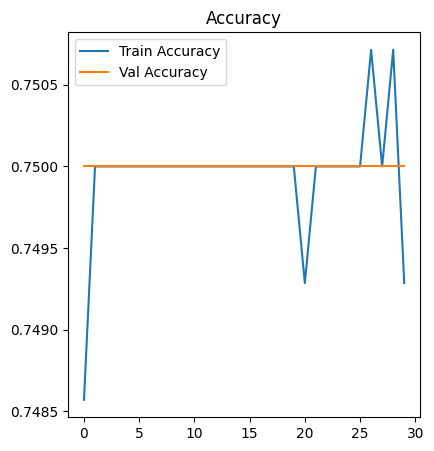

In [13]:
#Accuracy Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

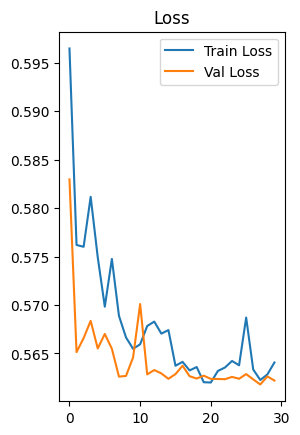

In [14]:
#Loss Plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()